# Gaia Tutorial and Assignment

## Intro to Astronomy 2024, Week 4

#### Originally written by Sarah Blunt, 2018 and modified by Aldo Panfichi, 2020. Updated by [Chetan Chawla](https://sites.google.com/view/chetanchawla), 2024.

### In this tutorial, you will:
- learn about the Gaia Database and basic queries
- learn about the Astronomical Data Query Language (ADQL)
- use the Gaia Database to get Gaia parameters for the 10,000 closest stars
- plot a color-magnitude diagram

## 1. Tutorial

#### Note: The tutorial is descriptive. Skip over the details which you are already aware of (most of these topics are marked with ✅)
#### Note: The data to be loaded for tutorial and the assignment is not uploaded alongside this notebook and you should download them yourself using the instructions specified from the Gaia Archive (to get familiar with it). If you have some doubts, post your questions on Piazza.

### 1.1. What is Gaia?

<div style="text-align:right;"><i>
Image Source: <a url=http://www.esa.int/Enabling_Support/Operations/Gaia_operations>ESA: Gaia Operations</a>
    </i> </div>
<img src="http://www.esa.int/var/esa/storage/images/esa_multimedia/images/2013/08/artist_s_impression_of_gaia3/12976074-3-eng-GB/Artist_s_impression_of_Gaia_pillars.jpg" alt="Gaia" style="width: 40%; float:right;"/>

Gaia is a mission led by the European Space Agency (ESA) to collect **photometric** (measurement of luminosity), **spectroscopic** (measurement of radiation intensity as a function of wavelength), and **(primarily) astrometric** (precise measurement of positions, distances and motions of stars and other astronomical bodies) data for several astronomical objects (mainly Milky Way stars).

The Gaia spacecraft (successor to the Hipparcos mission) was launched in 2013. Gaia aims to put together by far the largest and most precise 3D space catalog to date, totalling approximately 1 billion astronomical objects at a precision of $\mu$as (micro-arcseconds) - mainly consisting of stars, but also planets, comets, asteroids and quasars among others. It is positioned on the [second Lagrange point](https://solarsystem.nasa.gov/resources/754/what-is-a-lagrange-point/) of the Earth-Sun system, and it has two [Three-Mirror Anastigmatic telescopes](http://www.esa.int/var/esa/storage/images/esa_multimedia/images/2013/08/artist_s_impression_of_gaia3/12976074-3-eng-GB/Artist_s_impression_of_Gaia_pillars.jpg) positioned at an angle of 106.5° to give wide fields of view and to give absolute astrometry. Gaia can be used for stellar astrophysics, positional and motion survey of a billion stars in the Milky Way, measuring distances of far away clusters using variable stars, potential exoplanet discoveries using astrometry(primarly) and transits, and spectroscopy of stars. You can read more about Gaia operations [here](http://www.esa.int/Enabling_Support/Operations/Gaia_operations).

### 1.2. Gaia Data

Gaia Astrometric Data primarily contains of - Right Ascension (RA), Declination (Dec), Parallax, Radial Velocity (RV), Proper Motion in terms of Right Ascension (pmra), and Proper Motion in terms of Declination (pmdec).

1. ✅ **Right Ascension and Declination**- They are the longitude and latitude to position an object in the celestial frame of reference, or they are the celestial coordinates. They are calculated as positions in the plane of the sky. Read more about them at [https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/](https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/).
[(Image Source)](https://en.wikipedia.org/wiki/Right_ascension)

<img src="https://upload.wikimedia.org/wikipedia/commons/6/66/Ra_and_dec_demo_animation_small.gif" alt="RA Dec" style="width: 35%; float:center;"/> 

2. ✅ **Parallax**- The effect which causes an apparent shift in the position of an object with request to a background when observed from two different points (separated by a distance called basis) It is calculated as the semi-angle of inclination of these two different line of sights from the observation points to the object. Image source and more at: [https://en.wikipedia.org/wiki/Parallax](https://en.wikipedia.org/wiki/Parallax) 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Stellarparallax2.svg/340px-Stellarparallax2.svg.png" alt="Parallax" style="width: 15%; float:center;"/>

3. ✅ **Radial Velocity**- It is the velocity of an object in a direction away from or towards the Earth (observation point). In a more general sense, it is the velocity between the object and the observation point in the direction of the radius connecting the point and the object

4. ✅ **Proper Motions (RA and Dec)**- Proper Motion is the rate of angular drift in the plane of the sky or in a transverse direction. In other words, pmra and pmdec are the rates of change of the RA and Dec of an object in the sky respectively. Their resultant is also called the transverse velocity or total proper motion. The space velocity of an object is the resultant of the transverse velocity and the radial velocity

### 1.2.1. Gaia Data Releases

Gaia data is made publicly available through periodic data releases (DRs). Each Data Release has a richer data than the previous data release as Gaia covers the stars more times and adds new stars and objects as well. We had three full releases (DR1, DR2, and DR3)  until now, and DR3 is the latest update. We will be working with the most recent full release, DR3. 


### 1.2.2. Gaia Archive

Gaia Archive is a remote server which hosts the publicly available Data Releases of Gaia in the form of a database. It also provides us an interface to query the data and manipulate it according to our needs on the server itself, without us having the need to download the data first on our local computers. Using the Gaia archive site, we can get data on the positions, brightnesses, distances, and more for millions of stars and do various kinds of science and data visualization from them.

**The Gaia archive can be found here: https://gea.esac.esa.int/archive/**

Click on "Search" in the top left. You will see a form you can fill out to query the database. This is the "Basic" search, done through a GUI, where you can fill in conditions of your search using drop-down menus.

If you click on the "Advanced (ADQL)" tab at the top left, you will be able write your own, more complex query in an SQL-type language (SQL- Structured Query Language) made for Gaia (the Astronomical Data Query Language). You'll probably have to do this for the assignment, but for now, let's learn how the basic query works.

### 1.3 Basic Search

**Task:** We will use the Basic Search in Gaia Archive to fetch the first 500 stars in 3 arcminutes radius circle around the globular cluster, Messier 5. We will then read this data in Python and plot the stars in a RA-Dec space.

**Steps for Basic Search:**
1. Make sure you're on the Basic query page
2. In the "Name" field, type in "Messier 5". It should resolve the name. This will center our search on M5, a globular cluster in the constellation Serpens.
3. To the right, put a "3" and then change the unit from "arc sec" to "arc min". This will tell the archive to search in a radius of 3 arcminutes around M5. There are 60 arcseconds in an arcminute, and 60 arcminutes in a degree.
4. It shows only 2,000 records by default, hence we'd looking for the first 2,000 results.
5. Make sure that the "Search In" drop down says "gaiadr3.gaia_source". This specifies the data we want to use is from source of Gaia DR3 
6. Click "Submit Query"
7. You'll see a table pop up with the first 20 results from the query. At the bottom, change "VOTable" to "csv" and click "Download results". This will download a csv to your computer with the queried data in it.

*You can always click on "Show query in ADQL form" below, to see what your basic query would look like in ADQL syntax!*

In [1]:
%%html
<div style="text-align:center;">
<iframe src="https://gea.esac.esa.int/archive/" width="960" height="540"></iframe>
</div>

Now that we have downloaded the stellar data for top 2,000 stars in 3 arcminutes radius circle around M5, we will read that data in Python using Pandas and plot it.

In [1]:
# First, let's get the imports out of the way.

# numpy, for math (numerical calculations)
import numpy as np

# pandas, for data handling
import pandas as pd
pd.set_option('display.max_columns', None) # Display all of the columns of a DataFrame

# matplotlib, for plotting
import matplotlib.pyplot as plt

# "Magic command" to make the plots appear *inline* in the notebook
%matplotlib inline

In [2]:
#Now we can read the csv file into a pandas dataframe

m5 = pd.read_csv('data/m5_random_sorted.csv') # I renamed my csv file to 'm5.csv' and put it in the the subfolder 'data'

#Checking the top few rows of the data and the number of rows and columns
print("(Rows, Columns) =", m5.shape)
m5.head()

(Rows, Columns) = (2000, 27)


,designation,source_id,ra,dec,parallax,pmra,pmdec,ruwe,phot_g_mean_mag,bp_rp,radial_velocity,phot_variable_flag,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,ebpminrp_gspphot
0,Gaia DR3 4421572147224039168,4421572147224039168,229.644661,2.065325,NaN,NaN,NaN,NaN,18.490040,NaN,NaN,NOT_AVAILABLE,0,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gaia DR3 4421572078504275072,4421572078504275072,229.665075,2.063482,NaN,NaN,NaN,NaN,18.189290,0.732389,NaN,NOT_AVAILABLE,0,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gaia DR3 4421573040582044928,4421573040582044928,229.594617,2.080431,-0.080077,4.736057,-10.087433,0.98029,18.839410,1.014332,NaN,NOT_AVAILABLE,0,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gaia DR3 4421573281099010304,4421573281099010304,229.612213,2.122462,NaN,NaN,NaN,NaN,20.365652,NaN,NaN,NOT_AVAILABLE,0,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gaia DR3 4421573006218304128,4421573006218304128,229.634087,2.097981,NaN,NaN,NaN,NaN,18.434343,NaN,NaN,NOT_AVAILABLE,0,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


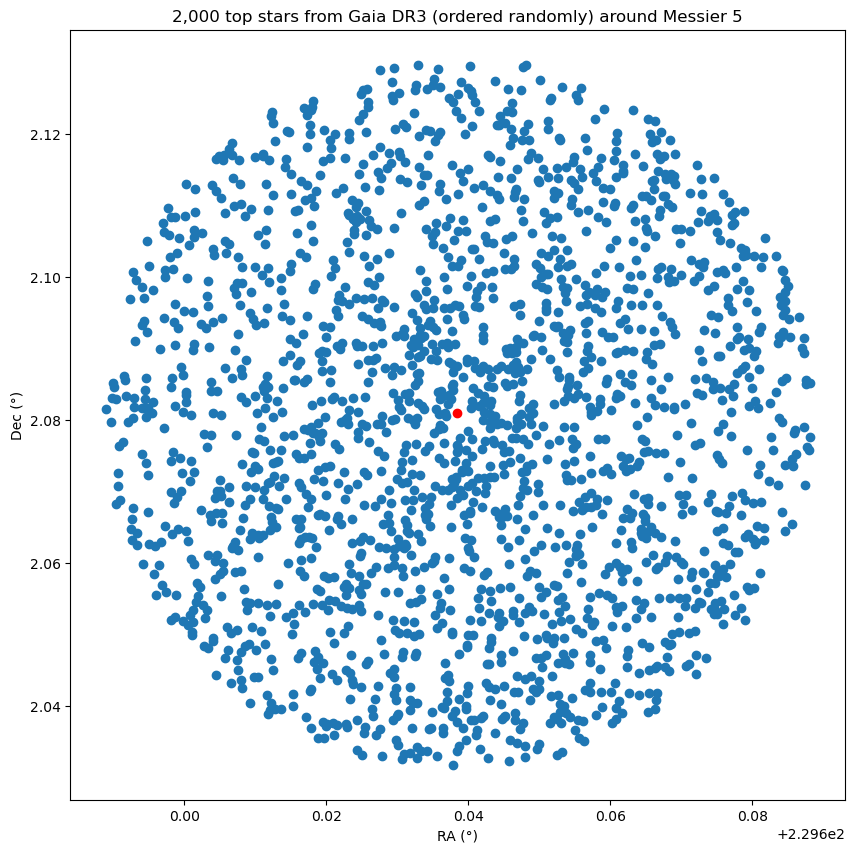

In [3]:
# Here are the results of our query plotted into ra/dec space

fig = plt.figure(figsize = [10,10]) # Defining and sizing figure

plt.scatter(m5['ra'], m5['dec']) # Creating a scatter-plot
plt.plot(229.638417, 2.081028, 'ro') # Plotting the coordinates of M5 in red (central coordinates for our circular search)
#The coordinates can be taken from the query through "Show query in ADQL form"

#Setting labels and title
plt.xlabel('RA (°)')
plt.ylabel('Dec (°)')
plt.title('2,000 top stars from Gaia DR3 (ordered randomly) around Messier 5')
plt.show()

### Note: 
The data in DR3 is not ordered randomly, hence we get the top 2,000 rows in the data in an ordered manner. To sort them randonly, we will have to spicify `ORDER BY random_index` in ADQL after clicking on "Show query in ADQL form" and then submitting the query.



### 1.4. A slightly more advanced search using the Simple Search

**Task:** We will use the basic search to fetch stars that are in a 1 degree radius circle in the sky, centered around the globular cluster M92, that have a parallax greater than or equal to 5 and the parallax divded by its error greater than 20 (say we want very precise measurements of distance, which is just 1/parallax). We can also say we only care to make astrometric measurements right now, so we don't care about any photometric datapoints such as colors or magnitudes.

**Steps for Basic Search:**
1. Make sure you're on the Basic query page
2. In the "Name" field type in "Messier 92". It should resolve the name. This will center our search on M92, a globular cluster in the northern constellation of Hercules.
3. To the right, put a "1" and then change the unit from "arc sec" to "degree". This will tell the archive to search in a radius of 1 degree around M92.
4. Under "Extra Conditions", you can add conditions to filter your data by. For example, say we wanted to look for close stars (say, with parallaxes greater than 5) with well-resolved parallax measurements (so the error in parallax is no larger than, say, 1/20th of the parallax value). In this example, we could do this by adding a condition that says "parallax" >= 5, and another condition to say "parallax_over_error" >= 20 (parallax_over_error >= 20 means that parallax value is atleast 20 times the error)
5. Under "Display Columns" you can pick and choose what data you wish to query the archive for. For example, say we want to take data on proper motions, but are not very interested in photometric data. In this example, under "Display Columns" we could add a checkmark to pmra and pmdec (proper motion), and uncheck other columns we don't need. We will also have the RA and Dec columns to recreate the plot we did above.
6. Play around with the conditions and columns if you want!
7. Make sure that the "Search In" drop down says "gaiadr3.gaia_source". This specifies the data we want to use is frrom source of Gaia DR3
8. Click "Submit Query"
9. You'll see a table pop up with the first 20 results from the query. At the bottom, change "VOTable" to "csv" and click "Download results". This will download a csv to your computer with the queried data in it.

*You can always click on "Show query in ADQL form" below, to see what your basic query would look like in ADQL syntax!*

Let us read the data in Python and plot the results

(Rows, Columns) = (172, 26)


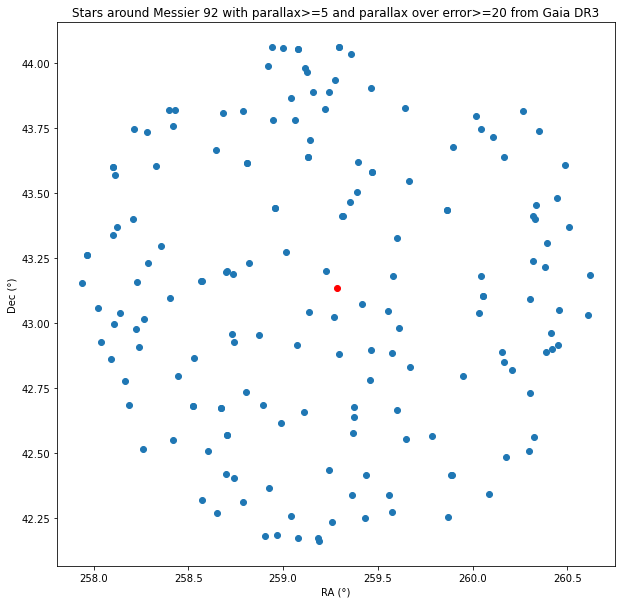

In [11]:
#For example, let's repeat the above plot
m92 = pd.read_csv('data/m92.csv') # I renamed my csv file to 'm92.csv' and put it in the the subfolder 'data'
print("(Rows, Columns) =", m92.shape) # Here we can see that we got only 160 stars

fig = plt.figure(figsize = [10,10]) # Defining and sizing figure

plt.scatter(m92['ra'], m92['dec']) # Creating a scatter-plot
plt.plot(259.2833, 43.1358, 'ro') # Plotting the coordinates of M92 in red

#Setting labels and title
plt.xlabel('RA (°)')
plt.ylabel('Dec (°)')
plt.title('Stars around Messier 92 with parallax>=5 and parallax over error>=20 from Gaia DR3')
plt.show()

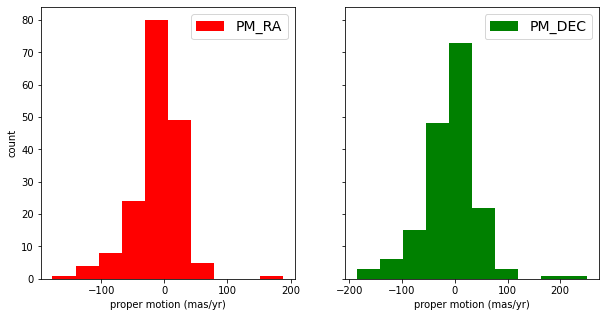

In [12]:
# Another example, let's take a quick & dirty look at the distribution of proper motions
# Here we plot the histograms of the pmra and pmdec values (in micro arcseconds per year)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.hist(m92['pmra'], label="PM_RA", color="r")
ax2.hist(m92['pmdec'], label="PM_DEC", color="g")

ax1.set_ylabel('count')
ax1.set_xlabel('proper motion (mas/yr)')
ax2.set_xlabel('proper motion (mas/yr)')

ax1.legend(loc="best", fontsize=14, numpoints=1)
ax2.legend(loc="best", fontsize=14, numpoints=1)
plt.show()

Play around with your data and matplotlib. What interesting things can you find?

### 1.5. Querying data with ADQL

#### 1.5.1. About ADQL
ADQL is a data query language similar to SQL, built for astronomical data purposes. Its syntax is similar enough to SQL if you are familiar with it, though with some differences. In ADQL you write queries to fetch data from the database, here, from the Gaia Archive Database. **If you are aware of basic level SQL, you can skip the following details (Marked with ✅)**


✅ A query has a specific structure it pertains to, just like a command. It is a compound of mainly these parts (only SELECT and FROM parts are required, others are optional) - 
1. ✅ **SELECT part**- It tells the columns we want to fetch in the query. The columns can be fetched using either `column_name` directly, or in case of complex queries involving multiple tables, require `table_name.column_name` to avoid any column name conflicts. We can also use ADQL functions or arithmetics in the SELECT part to manipulate the data before fetching it. If we want to fetch all columns from the table, we can use `SELECT *` or `SELECT table_name.*`. We can also set the (maximum) number of rows from the top we want to query using `SELECT TOP required_number` (Similarly, for bottom rows, we can use the keyword BOTTOM).
2. ✅ **FROM part**- It tells the table we want to fetch data from. It usually consists the schema name (which is a logical sub-structure of a database) and the table name. For example, for fetching the source data from the Gaia DR3 schema, we will have to use `FROM gaiadr3.gaia_source`.
3. ✅ **WHERE part**- It tells the conditions for fetching the data. As in the above example, we used two conditions other than the globular cluster name. These can be written as `WHERE gaia_source.parallax>=5 AND gaia_source.parallax_over_error>=20`, where `AND` is a restricted keyword in ADQL used to signify that both these conditions must be met for the queried rows
4. ✅ **ORDER BY part**- It tells how the data should be Ordered before fetching the data. We can use one or more colums to order the data on and `DESC` or `ASC` are used to specify the ordering to be Descending or Ascending respectively. The data is only ordered for the query and no changes are made in the actual data table. If we need the data to be ordered randomly, we need to use `ORDER BY random_item`, where `random_item` is a restricted keyword in ADQL.

✅ So, a simple query structure is
`SELECT <columns> FROM <tables> WHERE <conditions> ORDER BY <columns>`

There are more such parts we can add like GROUP BY (to create factor sets/subsets that have identical values for one or more columns, used to compute aggregates), INNER JOIN (to make computations on one or more referenced columns within a table), OUTER JOIN (to make computation based on multiple tables lined by one or more referenced columns), etc. The main distiction between SQL and ADQL is the addition of **Geometric extension functions** to SQL


#### 💡More resources for learning ADQL are mentioned in the Assignment part below.



#### 1.5.2. Writing a simple query

We're going to now look at a very simple ADQL query - Let's select the 100 stars closest to Earth (so, with the largest parallaxes) using ADQL. The syntax for this query goes as follows:

We select the top 100 results:

`SELECT TOP 100`

...and the following columns:

`gaia_source.source_id, gaia_source.ra, gaia_source.ra_error, gaia_source.dec, gaia_source.dec_error,
gaia_source.parallax, gaia_source.parallax_error`

...from the DR3 Source catalog:

`FROM gaiadr3.gaia_source`

...where the parallax is greater than 0 (to avoid issues with improperly catalogued parallaxes):

`WHERE gaia_source.parallax >= 0`

...and the results are in descending order by parallax to get the top 100 entries with maximum parallax:

`ORDER BY gaia_source.parallax DESC`

Putting the whole query together:

`SELECT TOP 100 
gaia_source.source_id, gaia_source.ra, gaia_source.ra_error, gaia_source.dec, gaia_source.dec_error,
gaia_source.parallax, gaia_source.parallax_error
FROM gaiadr2.gaia_source
WHERE gaia_source.parallax >= 0
ORDER BY gaia_source.parallax DESC`


In [13]:
#Let's take a look at what this data looks like!
closest100 = pd.read_csv('data/closest_100.csv')
print(closest100.shape)
closest100.head()

(100, 7)


,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error
0,4062964299525805952,272.237829,1.276152,-27.645916,0.830618,1851.882140,1.285094
1,4065202424204492928,274.906872,1.251748,-25.255882,1.571499,1847.433349,1.874937
2,4051942623265668864,276.223193,0.682959,-27.140479,0.500750,1686.265958,1.473535
3,4048978992784308992,273.112421,1.092637,-31.184670,1.362824,1634.283354,1.971231
4,4059168373166457472,259.297177,1.640748,-30.486547,2.069445,1513.989051,2.868580


# 2. Assignment

### 2.1. Notes:
- Working with ADQL can be challenging, especially if you don't have experience with SQL or related query languages. If you spend too much time stuck on a task, post about it on Discord. An instructor or your fellow students will help you out! Don't struggle needlessly.
- Make sure you complete the pandas and matplotlib tutorials before attempting this assignment.

### 2.2. Learn More About ADQL

1. Navigate to the Gaia ADQL interface. First, go [here](https://gea.esac.esa.int/archive/). Click "Search," then click "Advanced (ADQL)" (in the top left corner of the page). 

2. Read [this webpage](https://www.gaia.ac.uk/data/gaia-data-release-1/adql-cookbook) (only till *'Ten example ADQL queries'*; you can read the example queries if you want to go a step further!) 

3. Read slides 6-14 in [this powerpoint](https://www.cosmos.esa.int/documents/915837/915858/ADQL_handson_slides.pdf/652b9120-a3fe-4857-b5eb-933b476687ad).

   Try out some of the commands for yourself in the Gaia ADQL search bar you opened in step 1. Using the buttons that pop up to the right of your query results, you can download the results or view them in your browser. Hover over the buttons to see what they do.

   Don't worry if you don't understand everything in the powerpoint or the website! Pick out the most important slides/functions and summarize them for yourself. A quick ADQL reference guide can also be used [here](https://www.g-vo.org/pmwiki/uploads/About/adqlref_2016.pdf) 
   
   ** Note: wherever the powerpoint uses "gaiadr1.tgas_source," replace with "gaiadr2.gaia_source."

## 2.3 Use the Gaia DR3 Database to Get Gaia Parameters for the 10,000 Closest Stars

### 2.3.1 Write an ADQL query to get parameters of the 10,000 closest stars. Your query should return the following parameters:

- BP - RP color (bp_rp in the Gaia database)
- absolute g-band photometric magnitude (you'll need to calculate this one)
- distance
- RA
- Dec
- radius
- effective temprature

### Download your Query Results as a csv file. 

### Hints:
- Distance (in parsecs) is the inverse of parallax (in arcseconds). Keep an eye on units! Gaia by default shows parallaxes in milliarcseconds (mas) .
- You can calculate absolute photometric magnitude in the gband using this formula: phot_g_mean_mag + 5 + 5 * log10(parallax/1000). You can alias this value and can use these in conditions, grouping, joins, or ordering the data.
- Find the names of the colums for RA, Dec, radius and effective temparature using the database window part in the *Advanced (ADQL)* tab in *'Search'* of the Gaia archive 
- You'll need to use "ORDER BY" in your ADQL command.
- Some Gaia sources have negative parallaxes due to instrumental imperfections. You'll need to add a line to your query specifying that parallax must be greater than 0. 
- Using the buttons that pop up to the right of your query results, you can download the results or view them in your browser. Hover over the buttons to see what they do.

## 2.4. Plot a Color-Magnitude Diagram of the 10,000 Closest Stars

### 1. Using [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), read your downloaded csv file into a pandas DataFrame

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

# Type your pd.read_csv command here: 

df=pd.read_csv('data\stars_100.csv')
# HINTS: 
# - make sure the jupyter notebook and your csv file are in the same directory (or the csv file is in a subdirectory)
# - your read_csv command should be 1 line of code

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [7]:
df.head()

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error
0,5853498713190525696,217.392321,0.023999,-62.676075,0.034436,768.066539,0.049873
1,4472832130942575872,269.448503,0.026239,4.739420,0.029044,546.975940,0.040116
2,3864972938605115520,164.103190,0.066837,7.002727,0.051525,415.179416,0.068371
3,762815470562110464,165.830960,0.024126,35.948653,0.029373,392.752945,0.032067
4,2947050466531873024,101.286626,0.164834,-16.720933,0.227255,374.489589,0.231335


### 2. Using matplotlib.pyplot, make a scatterplot of BP-RP color vs absolute g-band magnitude. This is a [color-magnitude diagram, or the famously known, HR Diagram](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram)! 

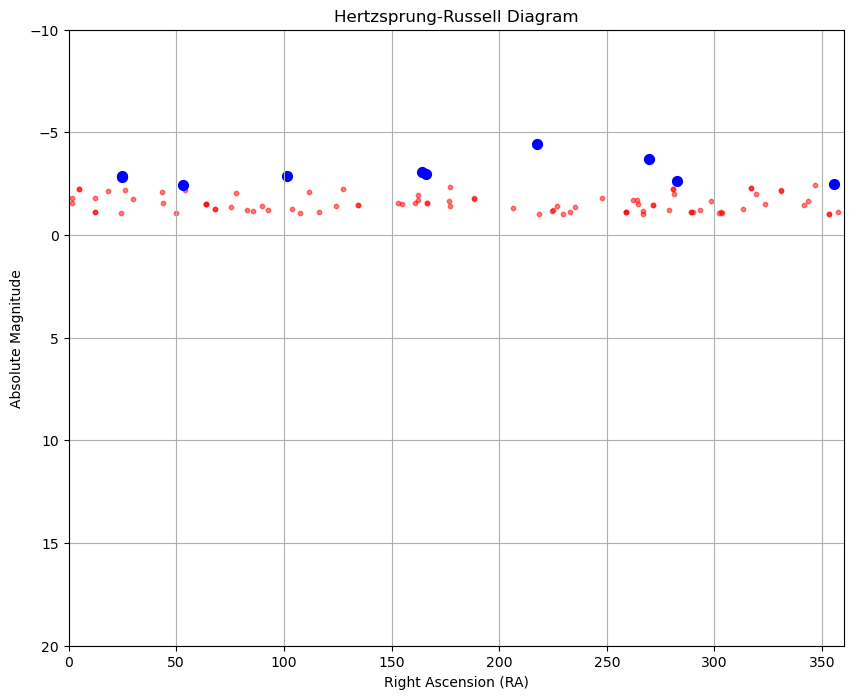

In [9]:


# Type your plotting code here:

# Calculate the absolute magnitude using the parallax
abs_mag = 5 * np.log10(1000 / df['parallax']) - 5

# Find the 10 closest stars
sorted_idx = np.argsort(abs_mag)[:10]
close_stars_abs_mag = abs_mag[sorted_idx]
close_stars_ra = df['ra'][sorted_idx]

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df['ra'], abs_mag, s=10, c='red', alpha=0.5)
ax.scatter(close_stars_ra, close_stars_abs_mag, s=50, c='blue', alpha=1)

# Add axis labels and title
ax.set_xlabel('Right Ascension (RA)')
ax.set_ylabel('Absolute Magnitude')
ax.set_title('Hertzsprung-Russell Diagram')

# Invert the y-axis to match the traditional HR diagram orientation
ax.invert_yaxis()

# Add grid and adjust the axis limits
ax.grid(True)
ax.set_xlim(0, 360)
ax.set_ylim(20, -10)

# Show the plot
plt.show()

# More Fun Things to Try if You're Interested:
# - use plt.ylim to reverse the direction of the y axis.
# - give your plot x and y labels.
# - make the points red
# - make the 10 closest stars blue and bigger than others

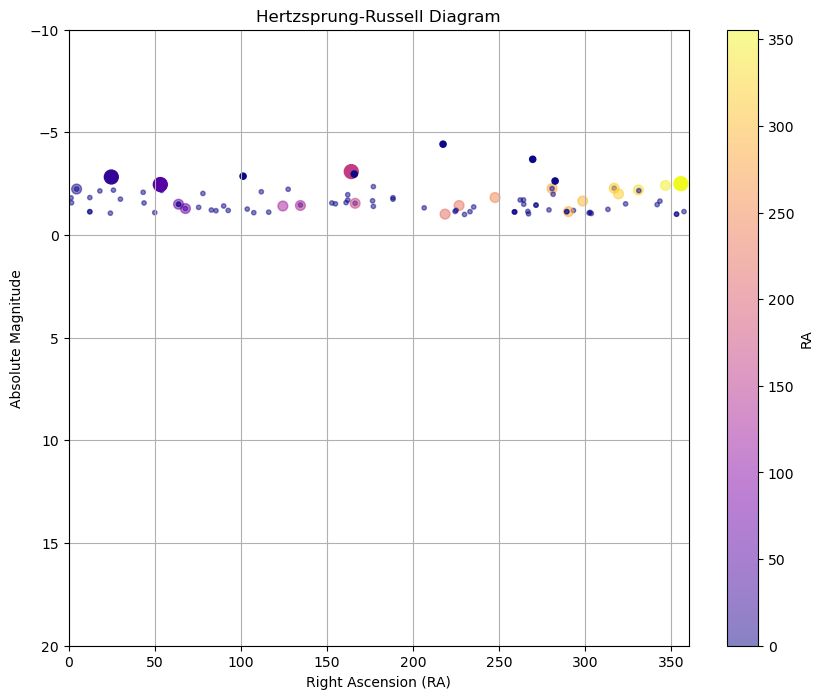

In [11]:
# More Fun Things to try if you're interested - Part 2:
# - give sizes of the stars as per their radii (only for stars having a non null radius_val in the data)
# - color the stars as per their effective tempratures (only for stars having a non null teff_val in the data)


# Calculate the absolute magnitude using the parallax
abs_mag = 5 * np.log10(1000 / df['parallax']) - 5

# Find the 10 closest stars
sorted_idx = np.argsort(abs_mag)[:10]
close_stars_abs_mag = abs_mag[sorted_idx]
close_stars_ra = df['ra'][sorted_idx]

# Set the marker size and color based on some other available data
# For example, you can use the source_id or other available columns
marker_sizes = np.where(np.mod(df['source_id'], 10) == 0, 50, 10)
marker_colors = np.where(np.mod(df['source_id'], 20) == 0, df['ra'], 0)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df['ra'], abs_mag, s=marker_sizes, c=marker_colors, cmap='plasma', alpha=0.5)
ax.scatter(close_stars_ra, close_stars_abs_mag, s=marker_sizes[sorted_idx] * 2, c=marker_colors[sorted_idx], cmap='plasma', alpha=1)

# Add axis labels and title
ax.set_xlabel('Right Ascension (RA)')
ax.set_ylabel('Absolute Magnitude')
ax.set_title('Hertzsprung-Russell Diagram')

# Invert the y-axis to match the traditional HR diagram orientation
ax.invert_yaxis()

# Add grid and adjust the axis limits
ax.grid(True)
ax.set_xlim(0, 360)
ax.set_ylim(20, -10)

# Add a colorbar for the marker color
cbar = plt.colorbar(ax.collections[0], orientation='vertical')
cbar.set_label('RA')

# Show the plot
plt.show()


## 2.5. BONUS Assignment
- Compare your results against Figure 1 and Figure 2 in this paper: **[Babusiaux et al. (2018)](https://arxiv.org/pdf/1804.09378.pdf).** 
- What similarities and differences do you notice? 
- Challenge 1 : read section 2.1 of this paper and try to reproduce their plot exactly.
- Challenge 2: Go to Week1 Python and Jupyter Intro.ipynb and try making the 3D plot with the 10,000 closest stars data you fetched

## 3. Annexure

To fetch data through ADQL directly using Python, we can use the Gaia Module in the Astroquery.Gaia package.

In [15]:
#Install astroquery on your system (if not already installed)
#!pip install astroquery

In [14]:
#Import astroquery
from astroquery.gaia import Gaia

# Using a very simple query we used earlier to fetch top 100 stars
query='SELECT TOP 100 source_id, ra, ra_error, dec, dec_error, parallax, parallax_error \
       FROM gaiadr3.gaia_source WHERE parallax >= 0 ORDER BY parallax DESC'
path = 'data/stars_100.csv'
# Using the function launch_job_async to launch query and dump the results to specified file path in csv format
job = Gaia.launch_job_async(query, output_file=path, output_format='csv', dump_to_file=True)


#Let's take a look at what this data looks like!
print("Job:", job)
closest100_python = pd.read_csv(path)
print('\n Shape of downloaded data: ', closest100_python.shape)
closest100_python.head()

Job: Jobid: 1723551356143O
Phase: COMPLETED
Owner: None
Output file: data/stars_100.csv
Results: None

 Shape of downloaded data:  (100, 7)


,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error
0,5853498713190525696,217.392321,0.023999,-62.676075,0.034436,768.066539,0.049873
1,4472832130942575872,269.448503,0.026239,4.739420,0.029044,546.975940,0.040116
2,3864972938605115520,164.103190,0.066837,7.002727,0.051525,415.179416,0.068371
3,762815470562110464,165.830960,0.024126,35.948653,0.029373,392.752945,0.032067
4,2947050466531873024,101.286626,0.164834,-16.720933,0.227255,374.489589,0.231335
